<h1><center>Wikipedia Web Scraper Project<center/><h1/>

<div>
<img src="https://upload.wikimedia.org/wikipedia/commons/thumb/b/b3/Wikipedia-logo-v2-en.svg/1200px-Wikipedia-logo-v2-en.svg.png" width="400"/>
</div>

## Background & Information

> In this web scraping project, I will be practicing grabbing data from a real website in order to use for future data visualization and analysis tasks. While this will only focus on getting familiar with Python's *BeautifulSoup* package and introductory levels of data extraction and cleaning, it is a crucial first step towards future projects I plan to do that may not have existing datasets. Today, we will be grabbing data from Wikipedia, more specifcally its [list of largest companies page](https://en.wikipedia.org/wiki/List_of_largest_companies_in_the_United_States_by_revenue) and turning the information from its table(s) to a .CSV file ready for data manipulation.

In [52]:
#Importing appropriate libraries

from bs4 import BeautifulSoup #python package for parsing HTML and XML documents 
import requests
import pandas as pd

In [53]:
#Connecting to appropriate website 

URL = 'https://en.wikipedia.org/wiki/List_of_largest_companies_in_the_United_States_by_revenue'

#Pulling data from page

page = requests.get(URL)

page_content = BeautifulSoup(page.text, "html")


In [61]:
table = page_content.find_all('table')[1]

In [62]:
#Grabbing columns titles of table

table_cols = table.find_all('th')
table_cols_titles = [title.text.strip() for title in table_cols]
print(table_cols_titles)

['Rank', 'Name', 'Industry', 'Revenue (USD millions)', 'Revenue growth', 'Employees', 'Headquarters']


### Creating the Data Frame using Python's *Pandas* package

In [56]:
df = pd.DataFrame(columns = table_cols_titles)

,Rank,Name,Industry,Revenue (USD millions),Revenue growth,Employees,Headquarters


In [57]:
#Grabbing row data of respective columns
column_data = table.find_all('tr')
for row in column_data[1:]:
    row_data = row.find_all('td')
    individual_row_data = [data.text.strip() for data in row_data]
    length = len(df)
    df.loc[length] = individual_row_data
    
#Let's take a look to see how our data frame is looking   
df

,Rank,Name,Industry,Revenue (USD millions),Revenue growth,Employees,Headquarters
0,1,Walmart,Retail,"611,289",6.7%,"2,100,000","Bentonville, Arkansas"
1,2,Amazon,Retail and cloud computing,"513,983",9.4%,"1,540,000","Seattle, Washington"
2,3,ExxonMobil,Petroleum industry,"413,680",44.8%,"62,000","Spring, Texas"
3,4,Apple,Electronics industry,"394,328",7.8%,"164,000","Cupertino, California"
4,5,UnitedHealth Group,Healthcare,"324,162",12.7%,"400,000","Minnetonka, Minnesota"
...,...,...,...,...,...,...,...
95,96,Best Buy,Retail,"46,298",10.6%,"71,100","Richfield, Minnesota"
96,97,Bristol-Myers Squibb,Pharmaceutical industry,"46,159",0.5%,"34,300","New York City, New York"
97,98,United Airlines,Airline,"44,955",82.5%,"92,795","Chicago, Illinois"
98,99,Thermo Fisher Scientific,Laboratory instruments,"44,915",14.5%,"130,000","Waltham, Massachusetts"


### Final Step: Saving the file as a .CSV to our computer
> After the following code that specifies the where to save the data frame, and naming it, we now have a .CSV ready for any data analysis for visualisation! Attached below is a screenshot of opening the data set in Microsoft Excel:

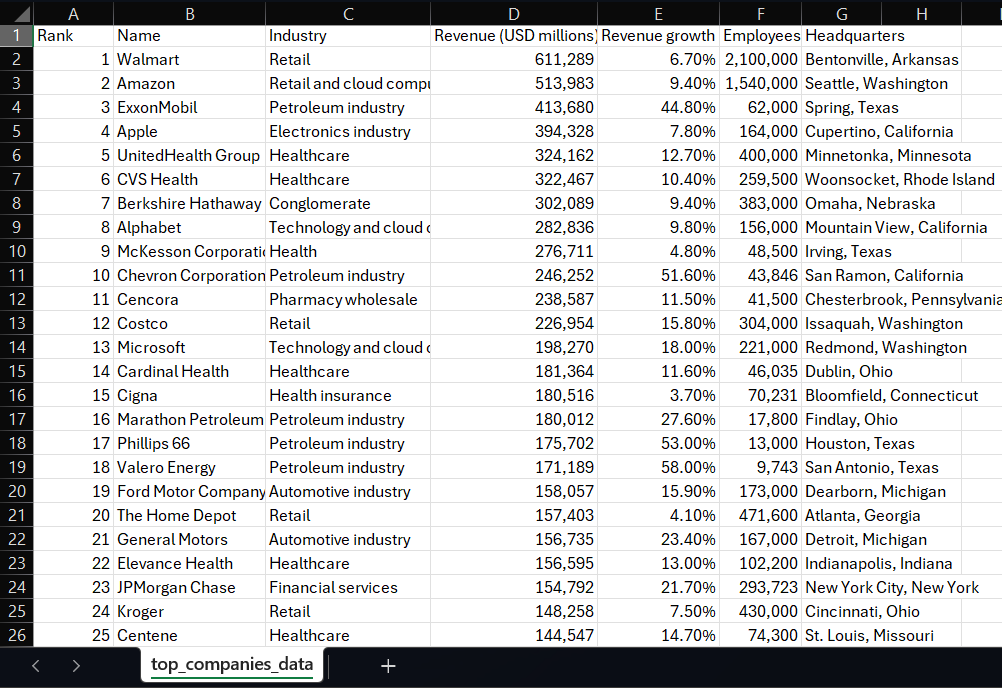



In [63]:
df.to_csv(r'C:\Users\Billy Dang\Desktop\Projects\WebScraper_Data\top_companies_data.csv', index = False)

### Acknowledgements:

> Data is courtesy of Wikipedia was accessed from https://www.wikipedia.org/.
Guidance and code for the following project was from *Alex The Analyst* whose channel can be found [here](https://www.youtube.com/@AlexTheAnalyst) & with his GitHub linked [here](https://github.com/AlexTheAnalyst/PythonYouTubeSeries/tree/main).